In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

In [24]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=100

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "F:\Deep Learning\PlantVillage",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 2152 files belonging to 3 classes.


In [4]:
classes = dataset.class_names
print(classes)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


0


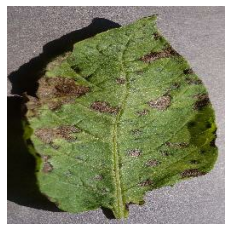

In [5]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    print(label_batch[0].numpy())

In [6]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds


In [7]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)
len(train_ds)

54

In [10]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
CHANNELS=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3) , activation='relu' ,input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_16 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/100
54/54 [==============================] - 107s 2s/step - loss: 0.9082 - accuracy: 0.4913 - val_loss: 0.8843 - val_accuracy: 0.4635
Epoch 2/100
54/54 [==============================] - 110s 2s/step - loss: 0.7493 - accuracy: 0.6372 - val_loss: 0.5663 - val_accuracy: 0.7812
Epoch 3/100
54/54 [==============================] - 105s 2s/step - loss: 0.4649 - accuracy: 0.8038 - val_loss: 0.3237 - val_accuracy: 0.8750
Epoch 4/100
54/54 [==============================] - 104s 2s/step - loss: 0.3554 - accuracy: 0.8519 - val_loss: 0.3217 - val_accuracy: 0.8542
Epoch 5/100
54/54 [==============================] - 108s 2s/step - loss: 0.2807 - accuracy: 0.8958 - val_loss: 0.3123 - val_accuracy: 0.9167
Epoch 6/100
54/54 [==============================] - 111s 2s/step - loss: 0.2674 - accuracy: 0.8941 - val_loss: 0.2122 - val_accuracy: 0.9219
Epoch 7/100
54/54 [==============================] - 100s 2s/step - loss: 0.2169 - accuracy: 0.9219 - val_loss: 0.4684 - val_accuracy: 0.8438
Epoch 

KeyboardInterrupt: 

In [28]:
score=model.evaluate(test_ds)

8/8 [==============================] - 3s 276ms/step - loss: 0.0836 - accuracy: 0.9648


In [29]:
keras.params

NameError: name 'keras' is not defined

First Image to Predict
Actual Value:  Potato___Late_blight
1/1 [==============================] - 0s 296ms/step
Predicted Value:  Potato___Late_blight
Confidence :  100.0


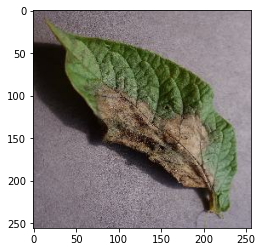

In [55]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    print("First Image to Predict")
    plt.imshow(first_image)
    print("Actual Value: ",classes[first_label])
    batch_prediction=model.predict(images_batch)
    print("Predicted Value: ",classes[np.argmax(batch_prediction[0])])
    print("Confidence : ",round(100*(np.max(batch_prediction[0])),2))

In [57]:
model_version=1
model.save(f"F:/Deep Learning/model/{model_version}")

INFO:tensorflow:Assets written to: F:/Deep Learning/model/1\assets


INFO:tensorflow:Assets written to: F:/Deep Learning/model/1\assets
